# Hello, world!

If you can run the cells in this notebook, then things should be set up correctly in your environment.

## First steps

The following code block will:
- Connect to the [FastF1](https://docs.fastf1.dev) data store;
- Load some information about one session (specifically, the qualification round for the [2019 Italian Grand Prix](https://en.wikipedia.org/wiki/2019_Italian_Grand_Prix); and
- output some basic information about a driver. 

In [4]:
import fastf1

session = fastf1.get_session(2019, 'Monza', 'Q')

session.load(telemetry=False, laps=False, weather=False)

vettel = session.get_driver('VET')

print(f"Pronto {vettel['FirstName']}?")
# The output of this block should end with "Pronto Sebastian?"

core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '44', '77', '5', '3', '27', '55', '23', '18', '7', '99', '20', '26', '4', '10', '8', '11', '63', '88', '33']


Pronto Sebastian?


## First plot

The following code block will generate a speed plot for a single driver (Charles Leclerc) from the 2019 Italian Grand
Prix.

core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '44', '77', '5', '3', '27', '55', '23', '18', '7', '99', '20', '26', '4', '10', '8', '11', '63', '88', '33']


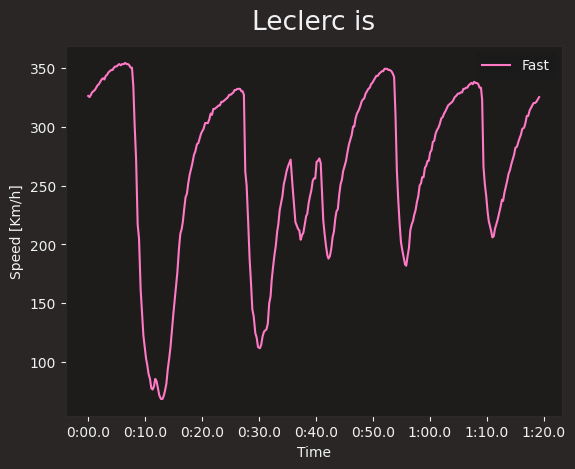

In [5]:
from matplotlib import pyplot as plt
import fastf1
import fastf1.plotting

fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme='fastf1')

session = fastf1.get_session(2019, 'Monza', 'Q')

session.load()
fast_leclerc = session.laps.pick_drivers('LEC').pick_fastest()
lec_car_data = fast_leclerc.get_car_data()
t = lec_car_data['Time']
vCar = lec_car_data['Speed']

# The rest is just plotting
fig, ax = plt.subplots()
ax.plot(t, vCar, label='Fast')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title('Leclerc is')
ax.legend()
plt.show()

---

This is the end of the notebook.